In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Loading data into a pandas dataframe

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

*drop features that are not required*

In [7]:
df2 = df1.drop(['area_type','availability', 'society','balcony'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.shape

(13320, 5)

# Data Cleaning: How to handle NA values..

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [13]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering

In [14]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0])) #.apply() for applying any functions or methods;  x.split gives two tokens out of which we only take the forst one [0] and since it is in str we need to convert it into int..

df3.head()

<ipython-input-14-59ba580439c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0])) #.apply() for applying any functions or methods;  x.split gives two tokens out of which we only take the forst one [0] and since it is in str we need to convert it into int..


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True 

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)    #df3['total_sqft'].apply(is_float) converts all the values that can be conveted into float to float and ~ denotes the value in the dataframe that cant be converted 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [21]:
df4 = df3.copy()

In [22]:
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [26]:
df5.location = df5.location.apply(lambda x: x.strip())   #strips any leading or lagging extra spaces..
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False) #graouping by location to obtain location column on which we find count and sort it in descending order
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
len(location_stats[location_stats < 10])

1039

In [28]:
location_stats_less_than_10 = location_stats[location_stats < 10]
location_stats_less_than_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [29]:
len(df5.location.unique())

1293

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)  #giving an other name to all locations having data points less than 10
len(df5.location.unique())

255

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
df5[df5.total_sqft/df5.bhk < 300].head()  #we check for all the values having area of each bedroom less than 300
df5.shape

(13246, 7)

In [33]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]  #we keep all the values where total_sqft/bhk > 300
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df6.shape

(12502, 7)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'): #grouping by location to remove outliers from each location..
        m = np.mean(subdf.price_per_sqft) 
        st = np.std(subdf.price_per_sqft) 
        reduced_df = subdf[(subdf.price_per_sqft > m - st) & (subdf.price_per_sqft < m + st)]  #keeping only the values that are 1SD away from mean i.e 68% of values..
        df_out = pd.concat([df_out,reduced_df], ignore_index = True) #appending reduced_df to df_out one by one 
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10222, 7)

**Checking for 2bhk and 3bhk how the property prices would look like.. normally the prices of 3bhk should be greater than 2bhk..**

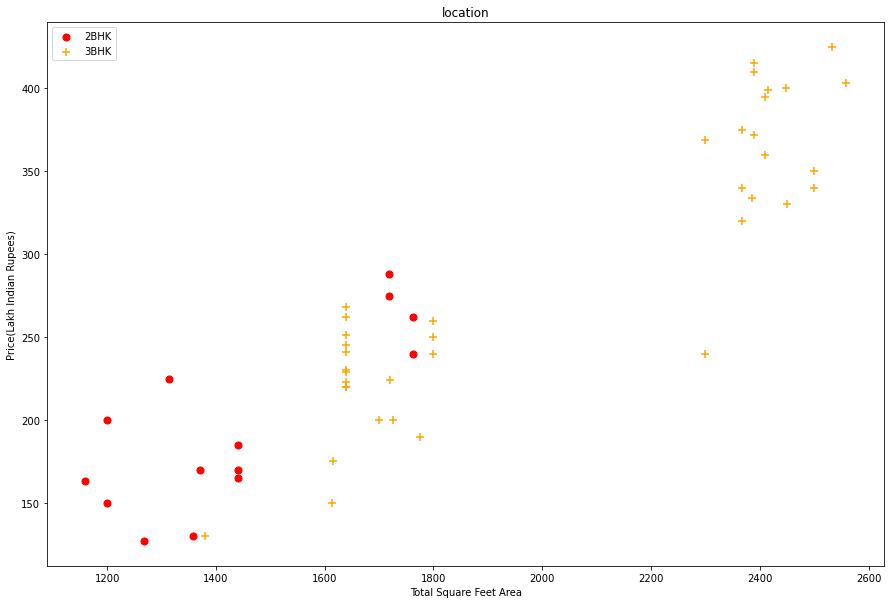

In [37]:
def plot_scatter_chart(df,location):    #scatter plot function
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'red', label = '2BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker = '+', color = 'orange', label = '3BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price(Lakh Indian Rupees)')
    plt.title('location')
    plt.legend()
    
plot_scatter_chart(df7,'Rajaji Nagar')
    

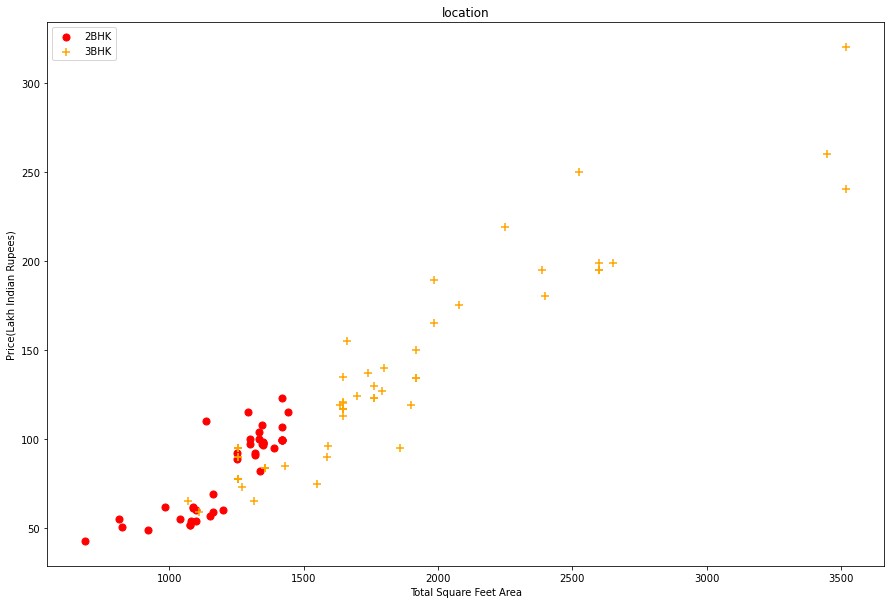

In [38]:
plot_scatter_chart(df7, 'Hebbal')

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'): #for every location we create a location_dataframe
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):  #for a particular location we get bhk and create bhk_dataframe 
            bhk_stats[bhk] ={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]                    #we calculate mean , SD and count for that location..
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values) #if the value of price_per_sqft of a current BHK is less than the mean of prev BHK then we remove that current BHK value..
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)

df8.shape    

(7369, 7)

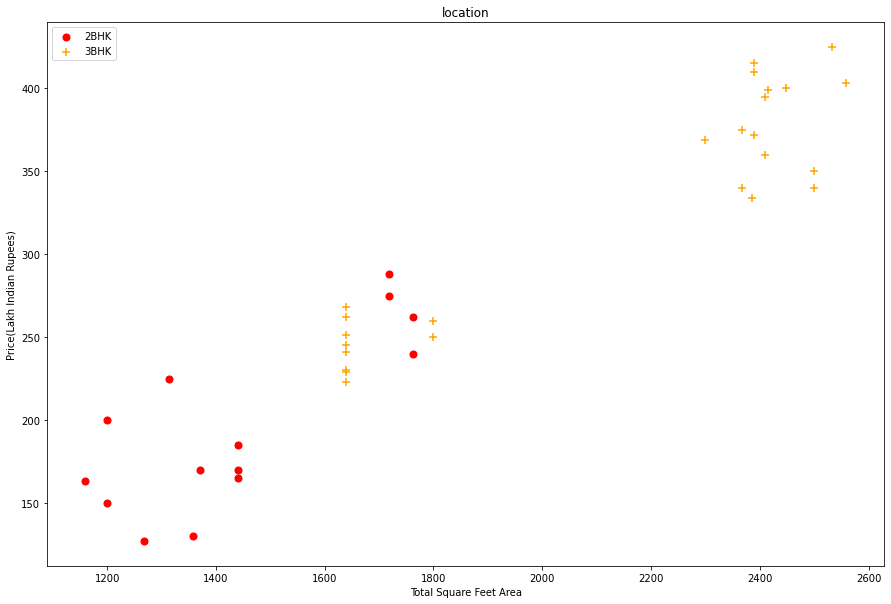

In [40]:
plot_scatter_chart(df8, 'Rajaji Nagar')

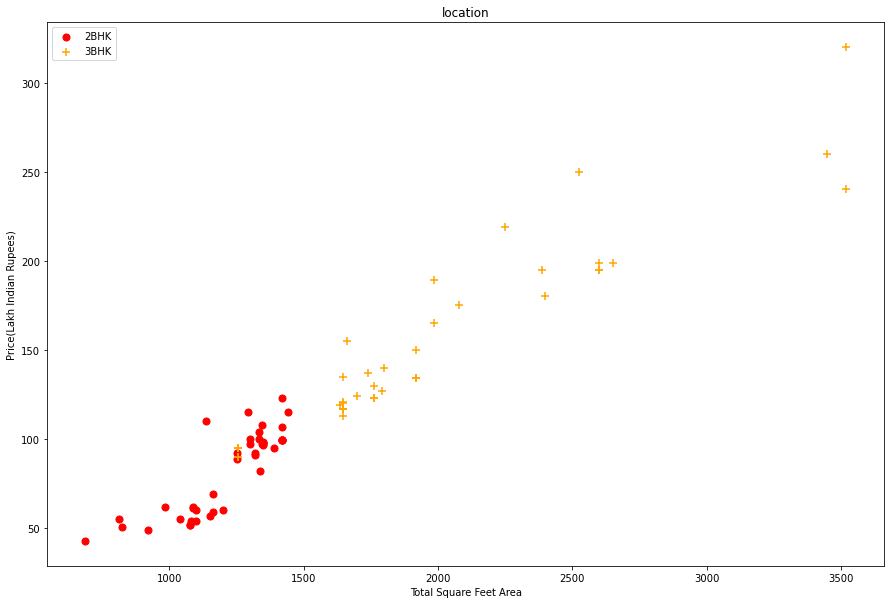

In [41]:
plot_scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count')

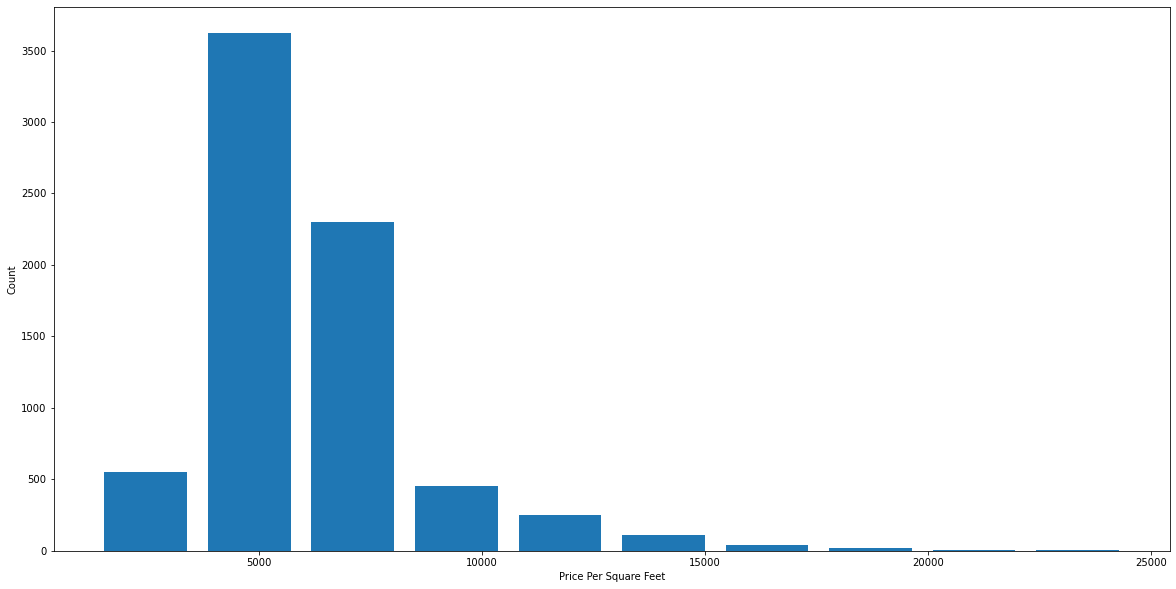

In [42]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

NORMAL DISTRIBUTION..

# Outlier removal using Bathroom features..

In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

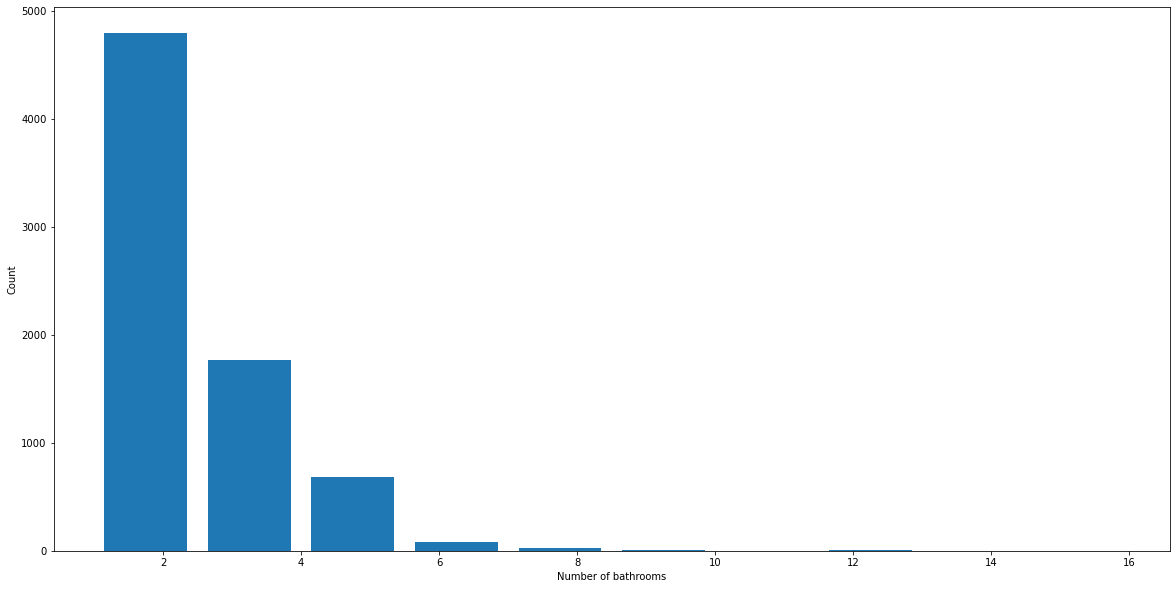

In [44]:
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

In [45]:
df8[df8.bath > 10].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8547,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8633,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9329,other,11 BHK,6000.0,12.0,150.0,11,2500.000000


In [46]:
df8[(df8.bath > df8.bhk + 2)].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df9 = df8[(df8.bath < df8.bhk + 2)]
df9.shape

(7291, 7)

In [48]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [49]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Using one hot encoding...

In [50]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns') #dropping one of the hot encoded columns...
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12 =  df11.drop('location', axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building Model..

In [53]:
X = df12.drop('price', axis = 'columns')
X.shape

(7291, 257)

In [54]:
y = df12['price']
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10213     70.0
10214    200.0
10217    110.0
10218     26.0
10221    400.0
Name: price, Length: 7291, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8556662450161686

# using k fold cross validation to measure accuracy of our model

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv )

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

# Finding the best model using gridsearchcv

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853445,{'normalize': True}
1,lasso,0.703370,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.688186,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [61]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [63]:
 np.where(X.columns=='5th Block Hbr Layout')[0][0]

8

In [64]:
def predict_price(location, sqft, bath, bhk):
    location_index = np.where(X.columns == location)[0][0] # returns the index value for a particular location on x.columns array..
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if location_index >= 0:
        x[location_index] = 1
    return lr_clf.predict([x])[0]

In [65]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

86.10543612162397

In [69]:
predict_price('1st Phase JP Nagar', 1000, 3, 2)

89.29892819358183

In [72]:
predict_price('Indira Nagar', 1000, 3,3)

173.4565709624221

# Exporting the tested model to a pickle file

In [73]:
import pickle 

with open('bengaluru_house_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

# Exporting location andcolumn information ..

In [76]:
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))